# Watershed Segmentation

In [1]:
import matplotlib.pyplot as plt
import sys
import os

sys.dont_write_bytecode = True

from src.utils import load_image, load_gt, compute_jaccard_score, compute_boundary_recall
from src.segmentation.watershed import watershed

In [2]:
ROOT = os.getcwd()
INDEX = 113016 #24063 

In [3]:
image_path = f'data\\images\\train\\{INDEX}.jpg'
ground_path = f'data\\ground_truth\\train\\{INDEX}.mat'

In [4]:
import cv2
original_image = load_image(image_path, cv2.IMREAD_COLOR)
original_image_gray = load_image(image_path)
segmented_image = watershed(original_image_gray)
gt_segmentation_bin = load_gt(ground_path)

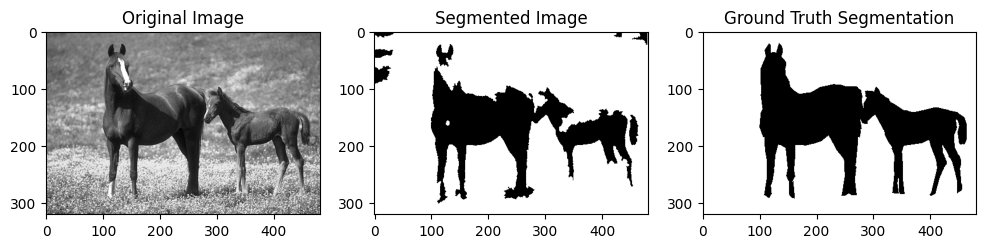

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(original_image_gray, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(segmented_image, cmap='gray'), plt.title('Segmented Image')
plt.subplot(1, 3, 3), plt.imshow(gt_segmentation_bin, cmap='gray'), plt.title('Ground Truth Segmentation')
plt.show()

In [6]:
jaccard_score = compute_jaccard_score(segmented_image, gt_segmentation_bin)
recall_score = compute_boundary_recall(segmented_image, gt_segmentation_bin)
print(f"Jaccard Score : {jaccard_score}\nBoundary Recall Score : {recall_score}")

Jaccard Score : 0.9178
Boundary Recall Score : 0.9989
